In [1]:
import numpy as np
import pandas as pd
import re
import gzip

In [8]:
df = pd.read_csv('../GDELT_2017/unrest_gdelt_2017_all.csv')

In [12]:
df.sample(30)

,Unnamed: 0,content,day,event_code,lat,long,month,place,time,title,url,year
39387,39387,Claiming that the NDA government has put an en...,5.0,13.0,18.0000,79.5000,10.0,IN,"Published: October 5, 2017 5:09:48 pm",Forces hit due to end in corruption trying to ...,http://indianexpress.com/article/india/forces-...,2017.0
33718,33718,"In a first, Indian scientists have found a way...",31.0,2017.0,22.5697,88.3697,7.0,IN,"Updated: July 31, 2017 3:06:04 pm",Indian scientists use tiny bubbles to draw pla...,http://indianexpress.com/article/technology/sc...,2017.0
48179,48179,BENGALURU: The colour of the forthcoming assem...,8.0,51.0,14.2333,76.4000,12.0,IN,NaN,"Inspired by Yogi, seers in Karnataka look to j...",https://timesofindia.indiatimes.com/city/benga...,2017.0
3489,3489,"In a unique effort, 2013s super-hit Bollywood ...",21.0,43.0,28.6667,77.2167,1.0,IN,"Published: January 21, 2017 8:55:29 pm",Queen remake: Tamannaah to play Kangana Ranaut...,http://indianexpress.com/article/entertainment...,2017.0
31007,31007,Deeply disturbed by the news of models in her ...,12.0,2017.0,19.2000,73.1667,7.0,IN,"Published: July 13, 2017 1:20:41 am",Images of Conflict Zones,http://indianexpress.com/article/lifestyle/art...,2017.0
25745,25745,Congress vice-president Rahul Gandhi is schedu...,8.0,2017.0,23.5000,78.5000,6.0,IN,"Updated: June 8, 2017 11:27:14 am",Madhya Pradesh farmers’ protest: Rahul Gandhi ...,http://indianexpress.com/article/india/mandsau...,2017.0
46460,46460,BENGALURU: Vidhana Soudha police on Saturday r...,26.0,25.0,12.9833,77.5833,11.0,IN,NaN,Sexual harassment claim: Advocate files statem...,https://timesofindia.indiatimes.com/city/benga...,2017.0
10659,10659,"LUDHIANA: Dr Ranjit Singh, former Additional D...",3.0,40.0,31.3256,75.5792,3.0,IN,NaN,Former ADC of Punjab Agricultural University c...,http://timesofindia.indiatimes.com/city/ludhia...,2017.0
12709,12709,KOLKATA: New Town has set out in search of a h...,16.0,90.0,22.3333,87.3333,3.0,IN,NaN,New Town study in pursuit of happiness,http://timesofindia.indiatimes.com/city/kolkat...,2017.0
42710,42710,The longest-serving and six-time Chief Ministe...,31.0,831.0,31.9167,77.2500,10.0,IN,"Updated: October 31, 2017 8:45:39 pm",Himachal Pradesh elections: Who is Virbhadra S...,http://indianexpress.com/article/india/himacha...,2017.0


In [13]:
df.to_csv('test_sample.csv')

In [3]:
dfs = pd.read_csv('test_sample.csv')

In [21]:
import unicodedata
# Function for removing unnecessary characters.
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\\", " ", string)
    string = re.sub(r"\'", " ", string)
    string = re.sub(r"\"", " ", string)
    string = re.sub(r"\n", " ", string)
    string = re.sub(r"=", " ", string)
    string = re.sub(r"-", " ", string)
    string = re.sub(r"/", " ", string)
    return string.strip()

In [24]:
from unidecode import unidecode
for i,row in dfs.iterrows():
    title = unidecode(row['title'])
    title = clean_str(title)
    content = unidecode(row['content'])
    content = clean_str(content)
    f = open('all_data/'+str(i)+'.txt', 'w')
    f.write(title)
    f.write('\n')
    f.write('\n')
    f.write(content)
    f.close()

In [3]:
all_counts = np.load('all_counts-1999.npy')

In [2]:
counts = np.load('counts-1999.npy')

In [7]:
counts

array({'began': 1, 'considers': 1, 'warming': 1, 'blamed': 2, 'liberal': 3, 'what': 31, 'coming': 1, 'already': 1, 'special': 2, 'white': 4, 'metropolitan': 2, 'catch': 1, 'rival': 2, 'attended': 1, 'assassination': 1, 'reach': 13, 'luxury': 1, 'syrian': 1, 'joined': 4, 'masood': 1, '1988': 1, 'fire': 1, 'substance': 1, 'corrupt': 1, 'silence': 1, 'cutting': 1, 'team': 1, 'lamenting': 1, 'rangpur': 1, 'video': 1, 'words': 1, 'powerful': 3, 'quarter': 2, 'corps': 1, 'hopes': 1, 'daud': 1, 'models': 1, 'reforming': 1, 'fear': 1, 'design': 1, 'worried': 1, 'assumed': 1, 'backcountry': 1, 'throughout': 30, 'multicultural': 2, 'leave': 26, 'likely': 1, '26': 1, 'targeted': 1, 'shared': 1, '1942': 1, 'advancing': 1, 'undercutting': 1, 'bless': 3, 'since': 23, 'charge': 1, 'undermining': 1, 'liberate': 3, 'alleged': 1, 'know': 3, 'overcome': 1, 'soaring': 1, 'things': 2, 'announced': 1, 'aggressive': 1, 'mattis': 1, 'country': 4, 'imagine': 1, 'few': 2, 'some': 7, '1980': 1, 'sold': 1, 'retur

In [9]:
sorted_all_counts = sorted(all_counts.items(), key=lambda kv: kv[1])
sorted_counts = sorted(counts.items(), key=lambda kv: kv[1])

In [17]:
c=sorted_counts[-100:]

In [25]:
c = dict(c)
ac = dict(sorted_all_counts)

In [25]:
x_val = [x[0] for x in sorted_fp]
y_val = [x[1] for x in sorted_fp]

In [36]:
import seaborn as sns

In [37]:
%matplotlib inline

In [16]:
df = pd.DataFrame(columns=['prep','final_probs','loc_count','all_count'])

In [29]:
for i in c.keys():
    try:
        df2 = pd.DataFrame([[i,c[i]/ac[i],c[i],ac[i]]],columns=['prep','final_probs','loc_count','all_count'])
        df = df.append(df2,ignore_index=True)
    except:
        continue

In [32]:
df = df[df['final_probs']<1]

In [44]:
df = df[df['prep'] != '—']

In [45]:
x_val = df['prep']
y_val = df['final_probs']

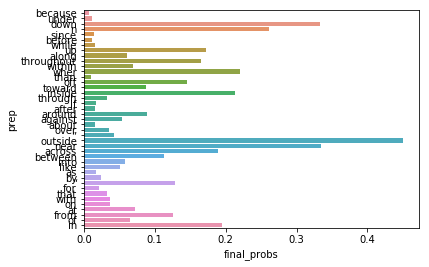

In [46]:
sns_plot = sns.barplot(y_val,x_val)

In [47]:
df

,prep,final_probs,loc_count,all_count
1,because,0.006743,17,2521
3,under,0.011880,17,1431
4,down,0.333333,17,51
5,n,0.260870,18,69
6,since,0.014566,23,1579
8,before,0.011294,24,2125
9,while,0.014992,27,1801
10,up,0.171598,29,169
11,along,0.060166,29,482
12,throughout,0.165746,30,181
